In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Zadanie 1

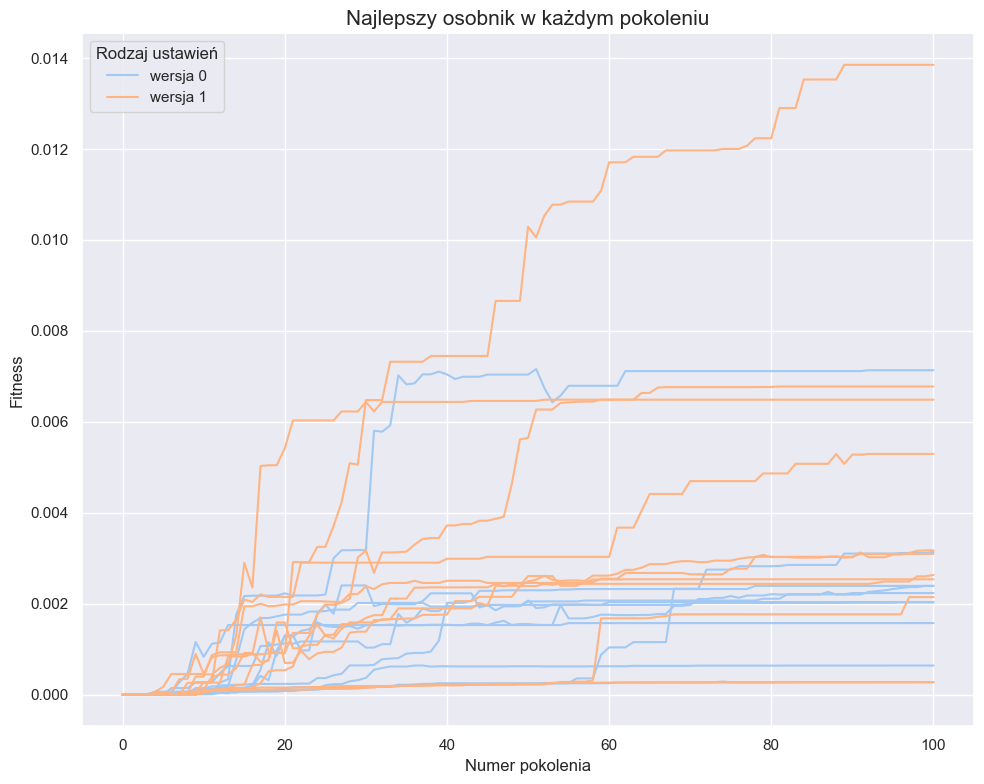

In [9]:
P_VALUES = ["0", "1"]
palette = sns.color_palette("pastel", len(P_VALUES))
color_map = dict(zip(P_VALUES, palette)) 
plt.figure(figsize=(10, 8))

for p in P_VALUES:
    for i in range(1, 11):
        df = pd.read_csv(f"../framspy/lab3/{p}/Deap/{i}.csv", usecols=['gen', 'max'])
        sns.lineplot(df, x='gen', y='max', color=color_map[p], label=f"wersja {p}" if i == 1 else "")

plt.title("Najlepszy osobnik w każdym pokoleniu", fontsize=15)
plt.ylabel("Fitness")
plt.xlabel("Numer pokolenia")

plt.legend(title="Rodzaj ustawień")
plt.tight_layout()
plt.savefig('1-przebiegi.png')
plt.show()

# Zadanie 2

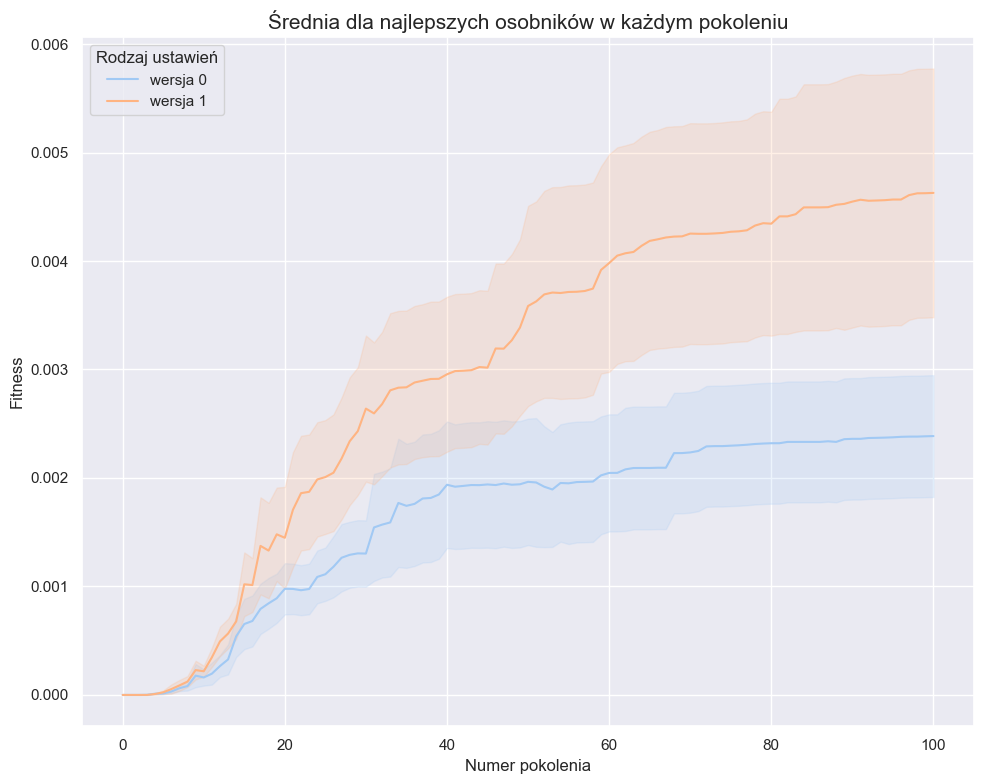

In [11]:
P_VALUES = ["0", "1"]
palette = sns.color_palette("pastel", len(P_VALUES))
color_map = dict(zip(P_VALUES, palette)) 
plt.figure(figsize=(10, 8))

for p in P_VALUES:
    df = pd.DataFrame()
    for i in range(1, 11):
        df_temp = pd.read_csv(f"../framspy/lab3/{p}/Deap/{i}.csv", usecols=['gen', 'max'])
        df = pd.concat([df, df_temp])
    sns.lineplot(df, x='gen', y='max', color=color_map[p], label=f"wersja {p}", errorbar=("sd", 0.3))

plt.title("Średnia dla najlepszych osobników w każdym pokoleniu", fontsize=15)
plt.ylabel("Fitness")
plt.xlabel("Numer pokolenia")

plt.legend(title="Rodzaj ustawień")
plt.tight_layout()
plt.savefig('2-przebiegi-agregacja.png')
plt.show()

# Zadanie 3

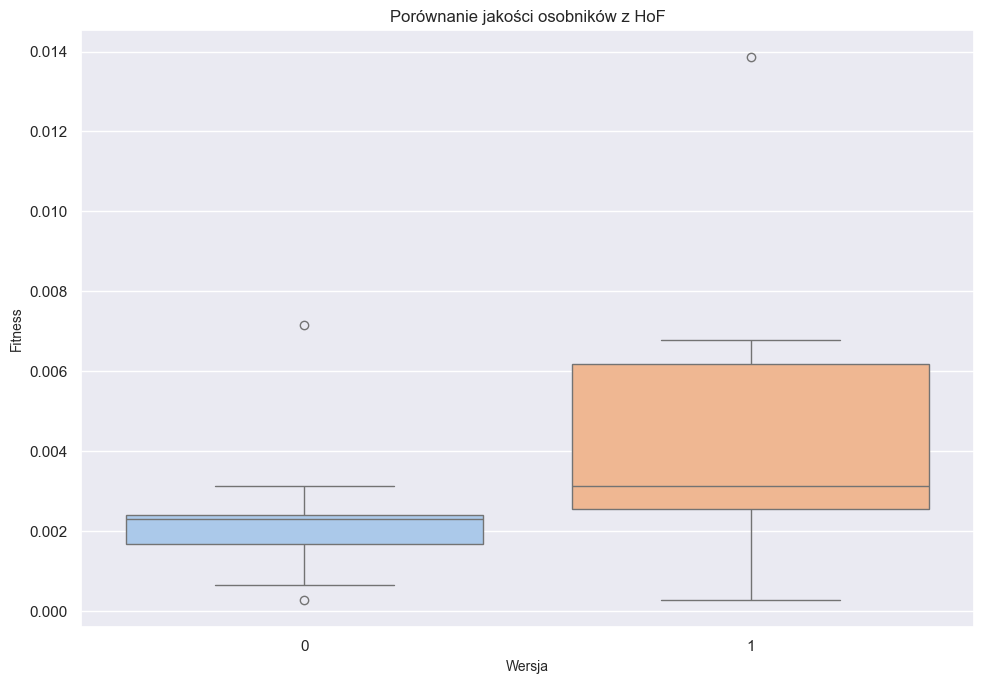

In [15]:
P_VALUES = ["0", "1"]
palette = sns.color_palette("pastel", len(P_VALUES))
color_map = dict(zip(P_VALUES, palette)) 
plt.figure(figsize=(10, 7))

data = {p_value: [] for p_value in P_VALUES}
for p in P_VALUES:
    for i in range(1, 11):
        with open(f"../framspy/lab3/{p}/HoF/{i}.gen") as file:
            for line in file:
                if line.startswith("velocity"):
                    value = float(line.split(':')[1])
                    data[p].append(value)
    

df = pd.DataFrame(data)
sns.boxplot(df, palette='pastel')

plt.title("Porównanie jakości osobników z HoF", fontsize=12)
plt.ylabel("Fitness", fontsize=10)
plt.xlabel("Wersja", fontsize=10)
plt.tight_layout()
plt.savefig('3-1-boxplot-fitness.png')
plt.show()

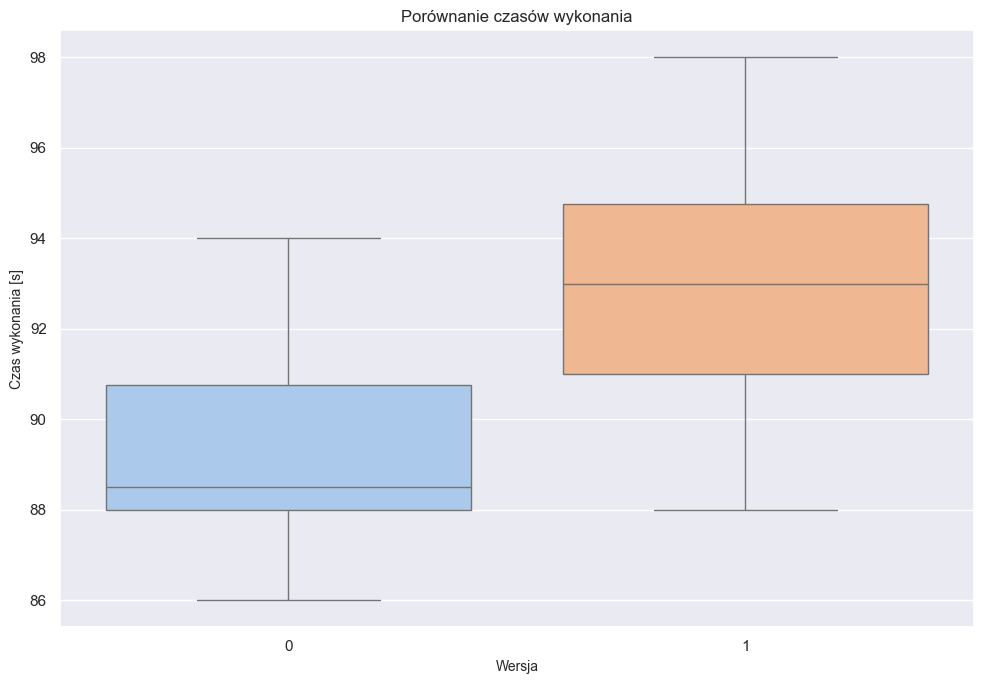

In [18]:
P_VALUES = ["0", "1"]
palette = sns.color_palette("pastel", len(P_VALUES))
color_map = dict(zip(P_VALUES, palette)) 
plt.figure(figsize=(10, 7))

data = {p_value: [] for p_value in P_VALUES}
for p in P_VALUES:
    df = pd.read_csv(f"../framspy/lab3/{p}/times.txt")
    data[p] = df['time'].to_list()
    

df = pd.DataFrame(data)
sns.boxplot(df, palette='pastel')

plt.title("Porównanie czasów wykonania", fontsize=12)
plt.ylabel("Czas wykonania [s]", fontsize=10)
plt.xlabel("Wersja", fontsize=10)
plt.tight_layout()
plt.savefig('3-2-boxplot-czas.png')
plt.show()